In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
issues = pd.read_csv('Issue Data Topic.csv', encoding='latin-1').filter(items=[
    'repo_id', 'id', 'comments', 'number', 'title', 'locked', 'state', 'topic'])
issues


,repo_id,id,comments,number,title,locked,state,topic
0,28027226,184325122,0,14,Back to multiple platform-specific impl classes,False,closed,-1
1,28027226,126477054,0,13,Impossible to add/remove components/nodes insi...,False,closed,2
2,28027226,125155660,0,12,Factory methods,False,closed,-1
3,28027226,115748487,0,11,Finish with Skybox as a fully built-in component,False,closed,-1
4,28027226,115746573,0,10,Rename script enums,False,closed,-1
...,...,...,...,...,...,...,...,...
29894,7431427,10794019,4,5,Add WolfET Decal Projector code,False,closed,2
29895,7431427,10793969,1,4,Support Sending Server Game Stats to Master Se...,False,open,-1
29896,7431427,10793903,1,3,Add Demo State Cgame System Calls,False,closed,-1
29897,7431427,10793844,6,2,Merge RTCW/WolfET Dynamic Light and Corona code,False,closed,2


In [2]:
issues.topic.unique()

array([-1,  2, 18, 10, 11,  6,  9,  8,  0, 15, 19,  3,  1,  5,  4, 14,  7,
       12, 16], dtype=int64)

In [3]:
issues.query('topic != -1')

,repo_id,id,comments,number,title,locked,state,topic
1,28027226,126477054,0,13,Impossible to add/remove components/nodes insi...,False,closed,2
6,28027226,115724853,0,8,Add method getColorAttachmentSize to RenderTarget,False,closed,18
8,28027226,115659045,0,6,Update camera cache when camera rendering orde...,False,closed,2
9,28027226,115001527,0,5,More flexible rendering function,False,closed,10
10,28027226,114799626,0,4,Asynchronous resource loading,False,closed,11
...,...,...,...,...,...,...,...,...
29890,7431427,11598453,0,9,Add trap_GetNews UI system call,False,open,1
29891,7431427,11597792,1,8,QVM's trap_Alloc doesn't work correctly,False,closed,0
29892,7431427,10829856,1,7,Truetype font not rendered with rend2,False,closed,10
29894,7431427,10794019,4,5,Add WolfET Decal Projector code,False,closed,2


In [4]:
issues.describe()

,repo_id,id,comments,number,topic
count,2.989900e+04,2.989900e+04,29899.000000,29899.000000,29899.000000
mean,6.748916e+07,3.755877e+08,2.762066,374.526874,1.798288
std,6.776820e+07,2.124645e+08,5.487790,456.576283,4.772826
min,1.182756e+06,1.326569e+06,0.000000,1.000000,-1.000000
25%,1.431899e+07,2.023521e+08,0.000000,54.000000,-1.000000
50%,4.520265e+07,3.722620e+08,1.000000,188.000000,-1.000000
75%,1.053816e+08,5.533272e+08,3.000000,531.000000,3.000000
max,3.290342e+08,7.957906e+08,246.000000,2446.000000,19.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('poster')
sns.set_palette('viridis')
sns.set_style('darkgrid')

Text(0.5, 0, 'Tópico')

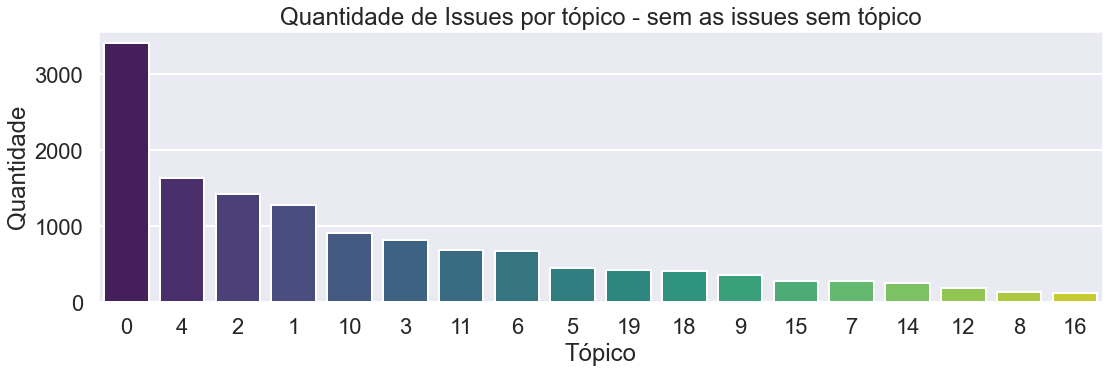

In [6]:
issuesC = issues.query('topic >= 0').groupby(
    'topic').size().sort_values(ascending=False)
plt.figure(figsize=(18, 5))
ax = sns.barplot(x=issuesC.index,y=issuesC.values, palette='viridis', order=issuesC.index)
ax.set_title('Quantidade de Issues por tópico - sem as issues sem tópico')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Tópico')

Text(0.5, 0, 'Tópico')

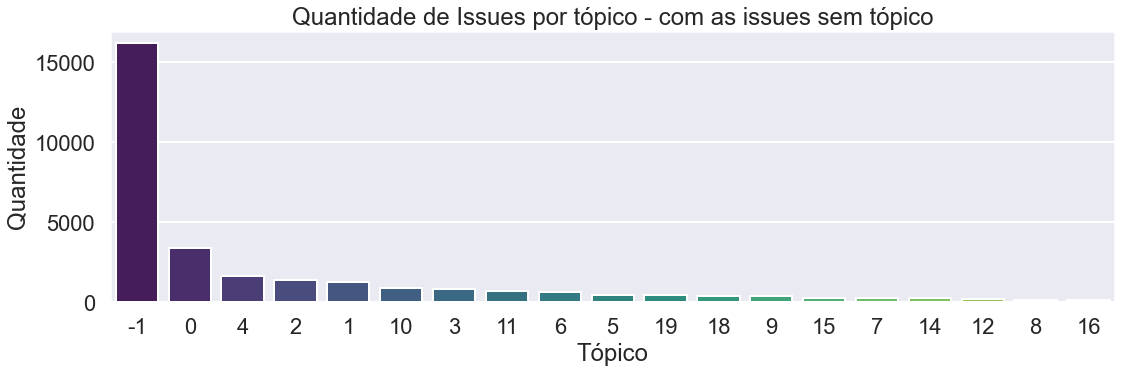

In [7]:
issuesC = issues.groupby(
    'topic').size().sort_values(ascending=False)
plt.figure(figsize=(18, 5))
ax = sns.barplot(x=issuesC.index,y=issuesC.values, palette='viridis', order=issuesC.index)
ax.set_title('Quantidade de Issues por tópico - com as issues sem tópico')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Tópico')


Text(0.5, 0, 'Número da issue')

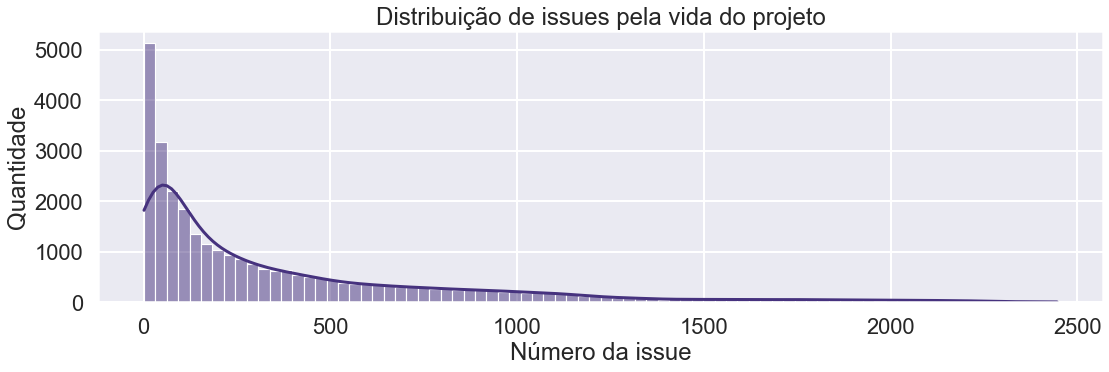

In [8]:
plt.figure(figsize=(18, 5))
ax = sns.histplot(data=issues, x='number', kde=True)
ax.set_title('Distribuição de issues pela vida do projeto')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Número da issue')


In [9]:
topics = pd.read_csv('Topics.csv')
topics


,Word 1,Prob 1,Word 2,Prob 2,Word 3,Prob 3,Word 4,Prob 4,Word 5,Prob 5,Word 6,Prob 6
0,editor,0.020,crash,0.013,make,0.008,project,0.008,using,0.007,work,0.007
1,objects,0.010,system,0.008,editor,0.008,crashes,0.007,animation,0.007,object,0.006
2,editor,0.010,remove,0.007,file,0.006,entity,0.005,code,0.005,camera,0.005
3,editor,0.010,camera,0.006,files,0.005,issue,0.005,problem,0.005,update,0.005
4,build,0.009,bug,0.008,editor,0.007,linux,0.007,engine,0.006,create,0.006
5,editor,0.016,debug,0.008,engine,0.008,missing,0.008,entity,0.006,mode,0.005
6,build,0.008,engine,0.008,work,0.006,animation,0.006,texture,0.006,move,0.006
7,editor,0.018,objects,0.006,file,0.005,scene,0.005,demo,0.005,engine,0.005
8,system,0.014,editor,0.013,mode,0.007,bug,0.006,work,0.006,input,0.006
9,editor,0.024,using,0.010,object,0.007,windows,0.007,collision,0.007,audio,0.006


In [10]:
topics.describe()

,Prob 1,Prob 2,Prob 3,Prob 4,Prob 5,Prob 6
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.013550,0.008700,0.007200,0.006550,0.005950,0.005700
std,0.005073,0.001976,0.001508,0.001099,0.000826,0.000657
min,0.007000,0.006000,0.005000,0.005000,0.005000,0.005000
25%,0.010000,0.007750,0.006000,0.005750,0.005000,0.005000
50%,0.011500,0.008000,0.007000,0.007000,0.006000,0.006000
75%,0.016250,0.010000,0.008000,0.007000,0.007000,0.006000
max,0.025000,0.013000,0.010000,0.008000,0.007000,0.007000


In [11]:
mean = [topics['Prob 1'].mean(), topics['Prob 2'].mean(),
        topics['Prob 3'].mean(), topics['Prob 4'].mean(), topics['Prob 5'].mean(),
        topics['Prob 6'].mean()]
min = [topics['Prob 1'].min(), topics['Prob 2'].min(),
       topics['Prob 3'].min(), topics['Prob 4'].min(), topics['Prob 5'].min(),
       topics['Prob 6'].min()]
max = [topics['Prob 1'].max(), topics['Prob 2'].max(),
       topics['Prob 3'].max(), topics['Prob 4'].max(), topics['Prob 5'].max(),
       topics['Prob 6'].max()]


Text(0.5, 0, 'Número da palavra')

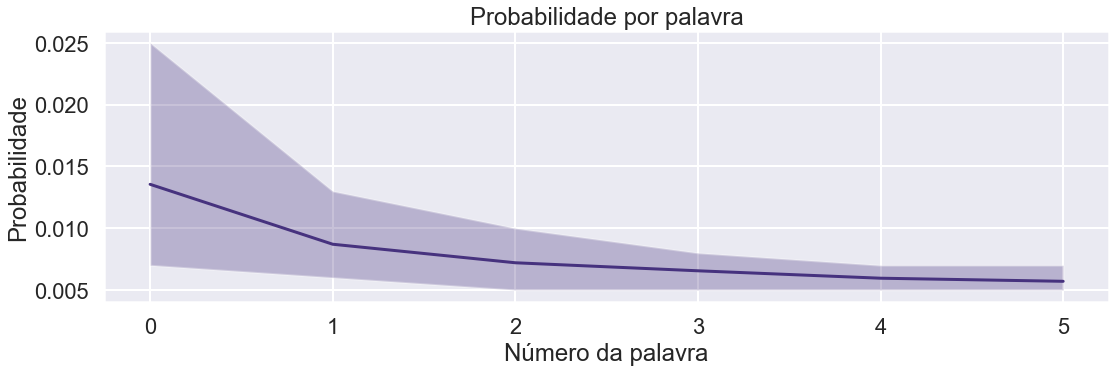

In [12]:
plt.figure(figsize=(18, 5))
ax = sns.lineplot(data=mean)
ax.fill_between(range(6), min, max, alpha=0.3)
ax.set_title('Probabilidade por palavra')
ax.set_ylabel('Probabilidade')
ax.set_xlabel('Número da palavra')


[]

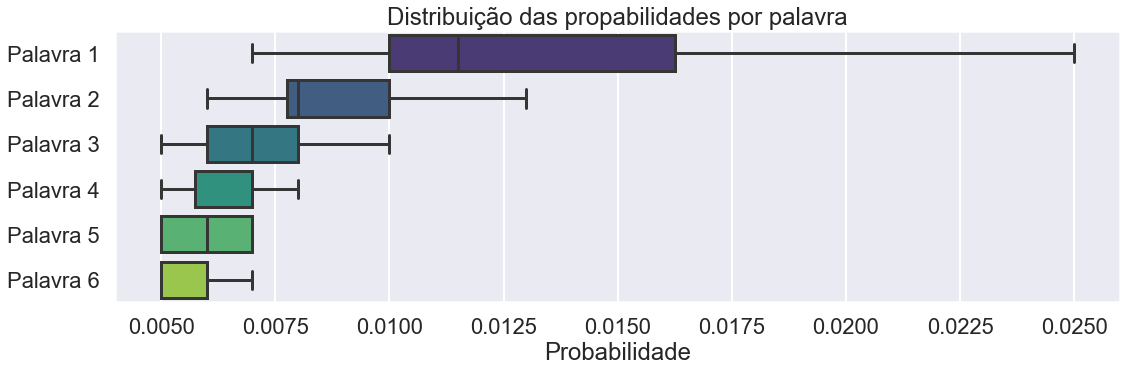

In [13]:
plt.figure(figsize=(18, 5))
ax = sns.boxplot(data=topics, orient='h')
ax.set_title('Distribuição das propabilidades por palavra')
ax.set_xlabel('Probabilidade')
ax.set_yticklabels(['Palavra 1', 'Palavra 2', 'Palavra 3',
                   'Palavra 4', 'Palavra 5', 'Palavra 6'])
ax.plot()


Text(0.5, 0, 'Número da issue')

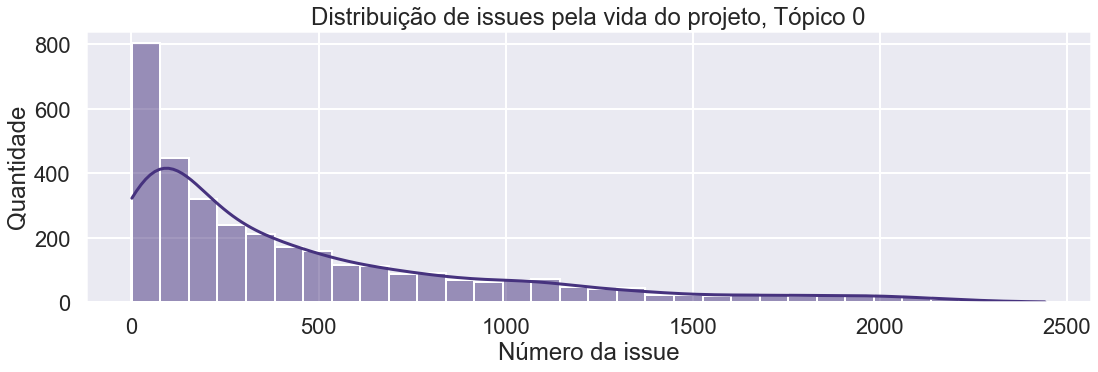

In [14]:
numbers = issues.query('topic == 0')
plt.figure(figsize=(18, 5))
ax = sns.histplot(data=numbers, x='number', kde=True)
ax.set_title('Distribuição de issues pela vida do projeto, Tópico 0')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Número da issue')


Text(0.5, 0, 'Número da issue')

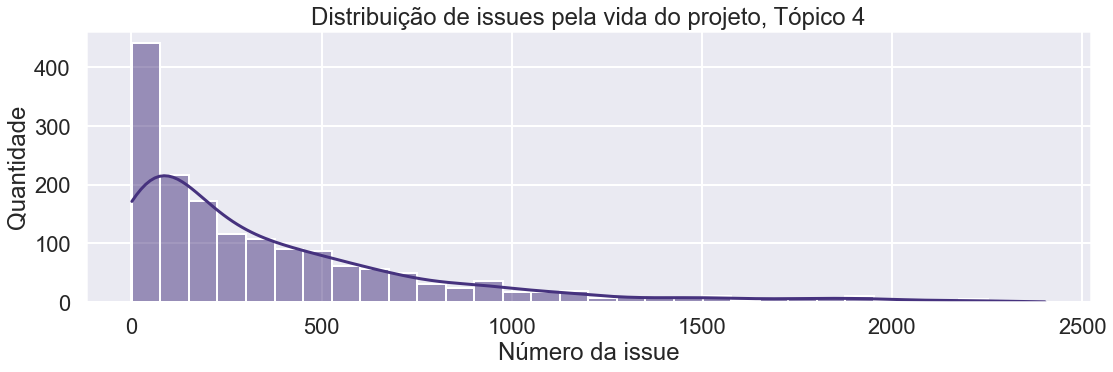

In [15]:
numbers = issues.query('topic == 4')
plt.figure(figsize=(18, 5))
ax = sns.histplot(data=numbers, x='number', kde=True)
ax.set_title('Distribuição de issues pela vida do projeto, Tópico 4')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Número da issue')


Text(0.5, 0, 'Número da issue')

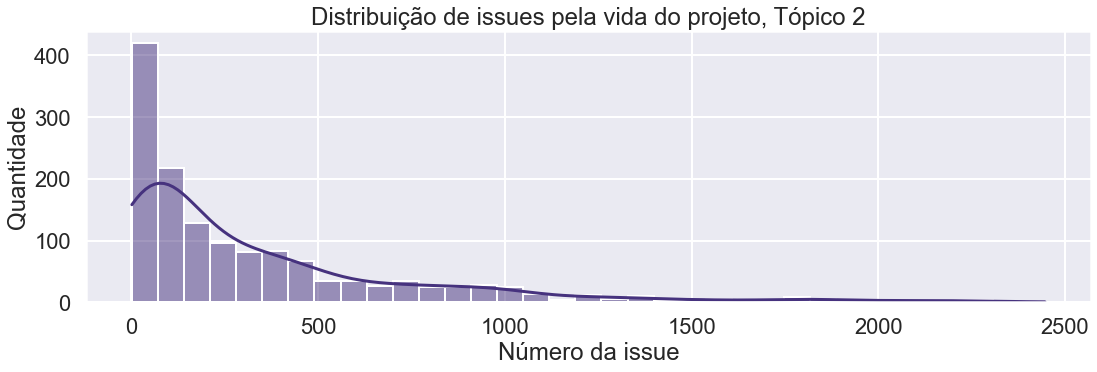

In [20]:
numbers = issues.query('topic == 2')
plt.figure(figsize=(18, 5))
ax = sns.histplot(data=numbers, x='number', kde=True)
ax.set_title('Distribuição de issues pela vida do projeto, Tópico 2')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Número da issue')
